In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

#import utils

%matplotlib inline

DATA_FILE = 'data/fire_theft.xls'

## Step 1: read in data from the .xls file


In [2]:
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

n_samples

42

## Step 2: create placeholders for input X (number of fire) and label Y (number of theft)


In [3]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

## Step 3: create weight and bias, initialized to 0


In [4]:
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

## Step 4: build model to predict Y


In [5]:
Y_predicted = X * w + b 

## Step 5: use the square error as the loss function


In [6]:
loss = tf.square(Y - Y_predicted, name='loss')

## Step 6: using gradient descent with learning rate of 0.00001 to minimize loss


In [7]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(loss)

## Step 7, 8, 9 -> inside tf.session()

#### Step 7: initialize the necessary variables, in this case, w and b
#### Step 8: train the model
#### Step 9: output the values of w and b


In [8]:
with tf.Session() as sess:
    
    # Step 7: initialize the necessary variables, in this case, w and b
    
    sess.run(tf.global_variables_initializer()) 

    # Step 8: train the model
    
    for i in range(100): # train the model 100 epochs
        total_loss = 0
        for x, y in data:
            # Session runs train_op and fetch values of loss
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
            total_loss += l
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

    
    # Step 9: output the values of w and b
    
    w, b = sess.run([w, b]) 

Epoch 0: 1451.383081254505
Epoch 1: 1110.3922530582972
Epoch 2: 887.9679070824668
Epoch 3: 742.8395941570578
Epoch 4: 648.1089486564908
Epoch 5: 586.2437477906545
Epoch 6: 545.815416138087
Epoch 7: 519.3731127013231
Epoch 8: 502.05884500983217
Epoch 9: 490.70433266203673
Epoch 10: 483.2427166956477
Epoch 11: 478.32566492226243
Epoch 12: 475.073103222109
Epoch 13: 472.9103079253719
Epoch 14: 471.46170754234
Epoch 15: 470.4820155728431
Epoch 16: 469.81056277241026
Epoch 17: 469.34217857463017
Epoch 18: 469.0079623091789
Epoch 19: 468.7625400168555
Epoch 20: 468.57630229847774
Epoch 21: 468.42948669762836
Epoch 22: 468.30919638701846
Epoch 23: 468.2067635967618
Epoch 24: 468.11656749816166
Epoch 25: 468.0346825520198
Epoch 26: 467.95857561202274
Epoch 27: 467.8864829086122
Epoch 28: 467.8173391081038
Epoch 29: 467.7501406896682
Epoch 30: 467.68449651627316
Epoch 31: 467.61990728264766
Epoch 32: 467.5561681077594
Epoch 33: 467.4930199498222
Epoch 34: 467.4303236234756
Epoch 35: 467.3680173

In [9]:
print(b)
print(w)


0.611998
2.13033


# Plot the results


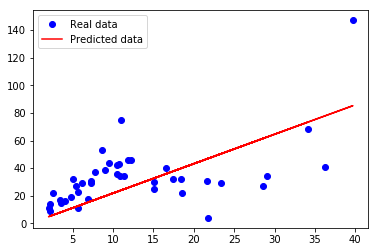

In [10]:
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()